<a href="https://colab.research.google.com/github/kavya-pv/CognoRise-InfoTech/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Titanic Survival Prediction**


**Objective of the study:**

The goal of this project is to build a prediction model that predicts weather a passenger on the Titanic survived or not.



**Attribute information**

The Titanic dataset has following variables:

 1 PassengerID : ID of the Passenger.

 2 Survived: Survival (0 = No; 1 = Yes)

 3 Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

 4 Name : Name of the Passenger

 5 Sex: Sex of the Passenger (Female / Male)

 6 Age: Age of the Passenger.

 7 Sibsp: Number of siblings/spouses aboard

 8 Parch: Number of parents/children aboard

 9 Ticket : Ticket number.

10 Fare: Passenger fare (British pound)

11 Cabin: Cabin number

12 Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton

In [12]:
#import required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('/content/archive(1).zip')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### **DATA PREPROCESSING**

In [14]:
# Getting top 5 rows of Dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
# Getting last 5 rows of Dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [16]:
#Getting all columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
#check the descriptive statistics of numeric variables
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
#view the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [19]:
# Getting dataset size
df.shape

(418, 12)

In [20]:
#checking duplicates values
df.duplicated().sum()

0

In [21]:
#checking duplicates values
df.duplicated().sum()

0

In [22]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S




We have imputed missing values with mean for 'Age' and 'Fare' variables and we have droped 'Cabin' variable because of too many missing values.


In [23]:
df.drop(['Cabin'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


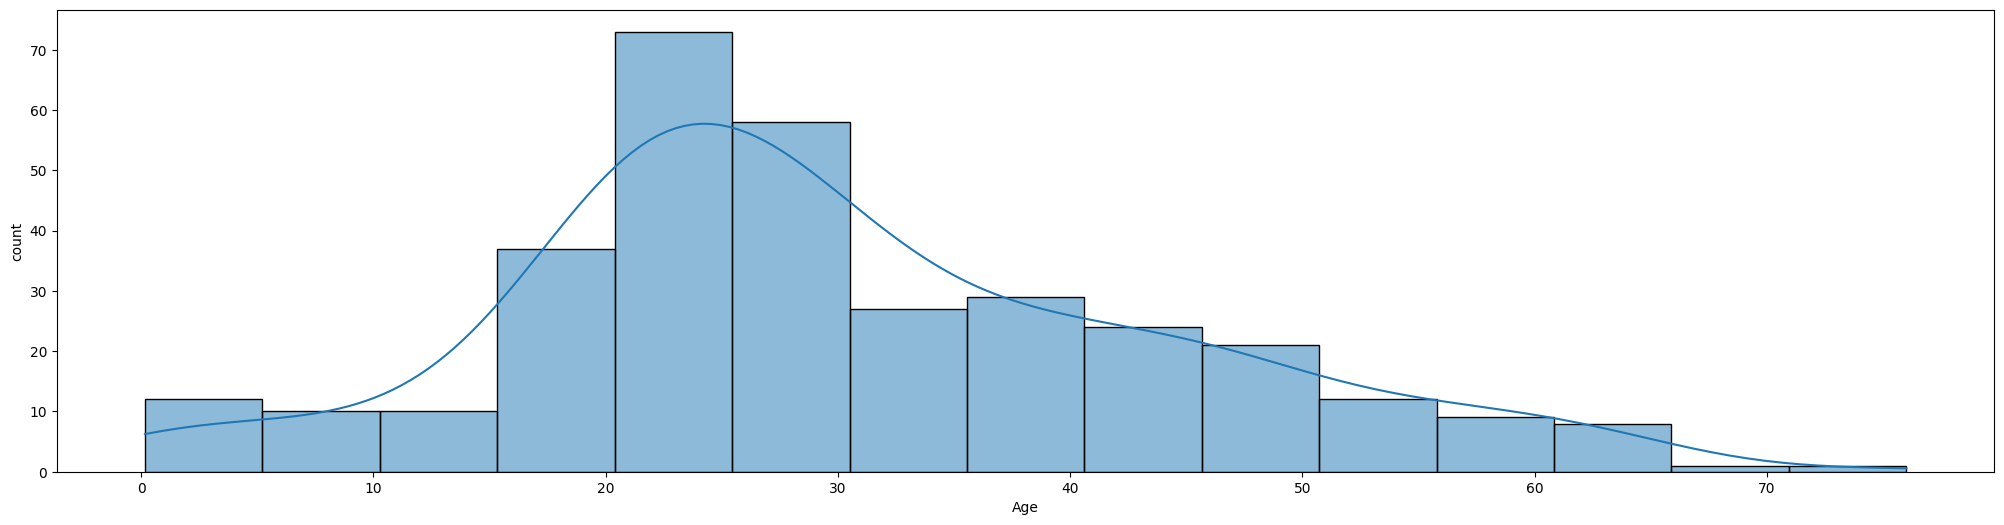

In [24]:
plt.figure(figsize=(25,6))
sns.histplot(df.Age,kde=True)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [25]:
#replace null values
df.Age=df.Age.fillna(df['Age'].mean())
df.Fare=df.Fare.fillna(df['Fare'].mean())
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


### **DATA VISUALIZATION**

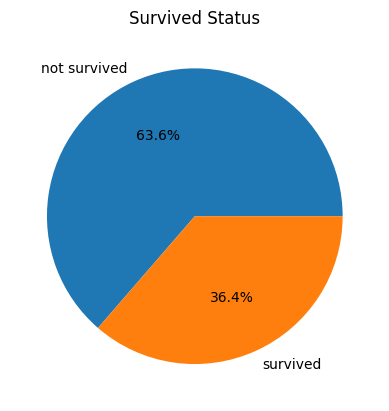

In [26]:
mylabels=['not survived','survived']
plt.pie(x=df['Survived'].value_counts(),labels=mylabels,autopct='%1.1f%%')
plt.title("Survived Status")
plt.show()

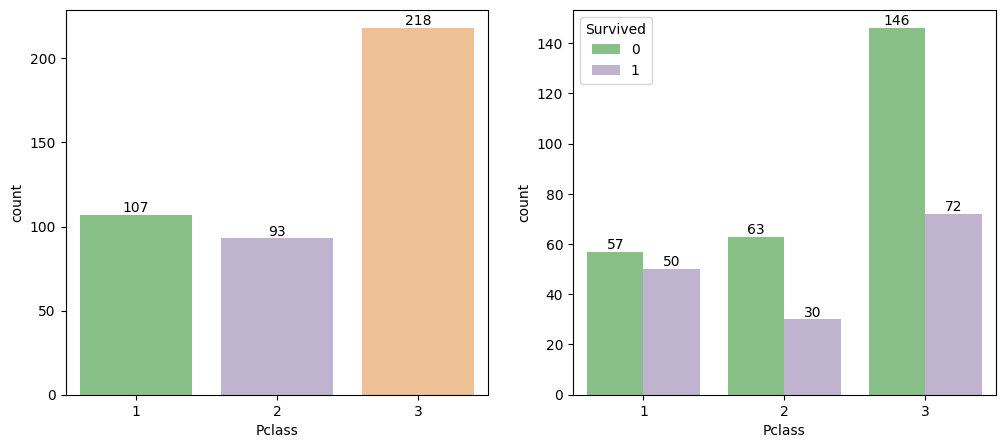

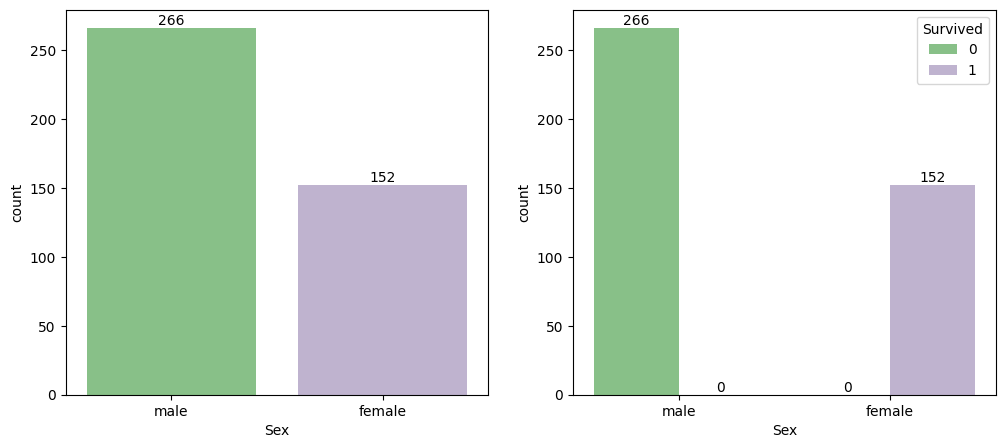

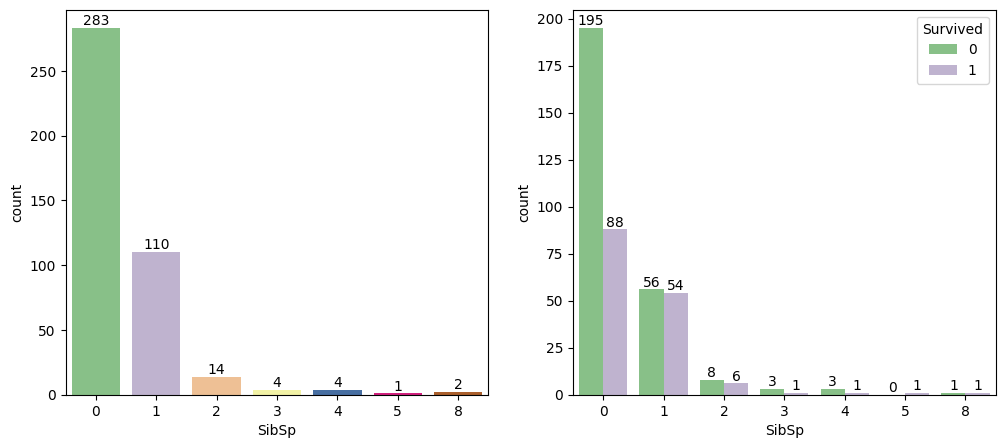

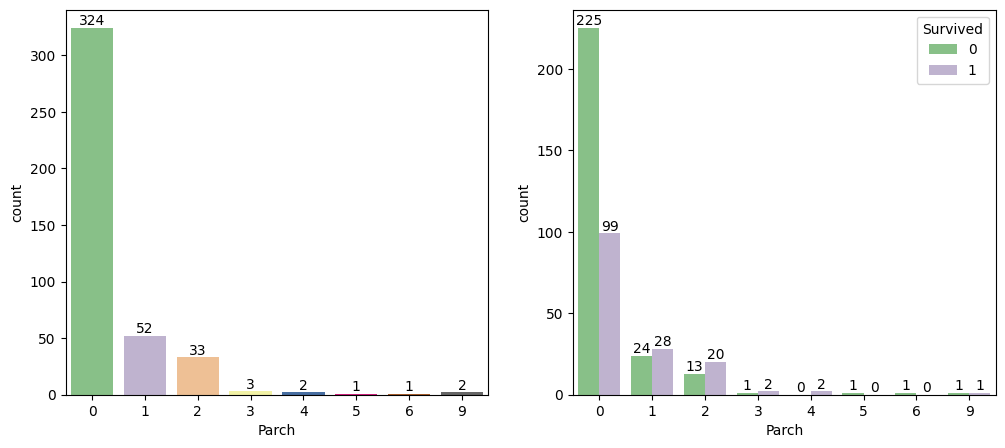

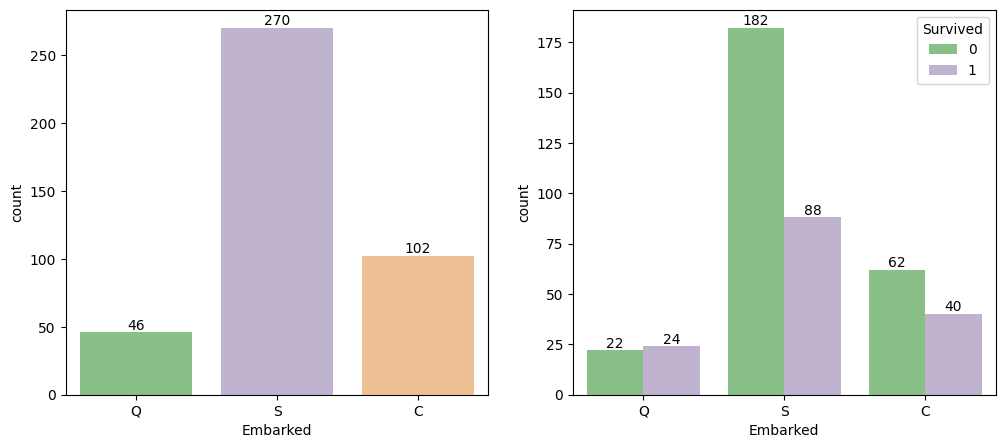

In [27]:
for column in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df, palette='Accent')
    ax.bar_label(ax.containers[0])

    plt.subplot(1,2,2)
    ax = sns.countplot(x=column, data=df, hue='Survived', palette='Accent')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

<ipython-input-28-5c5560f47458>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[column])


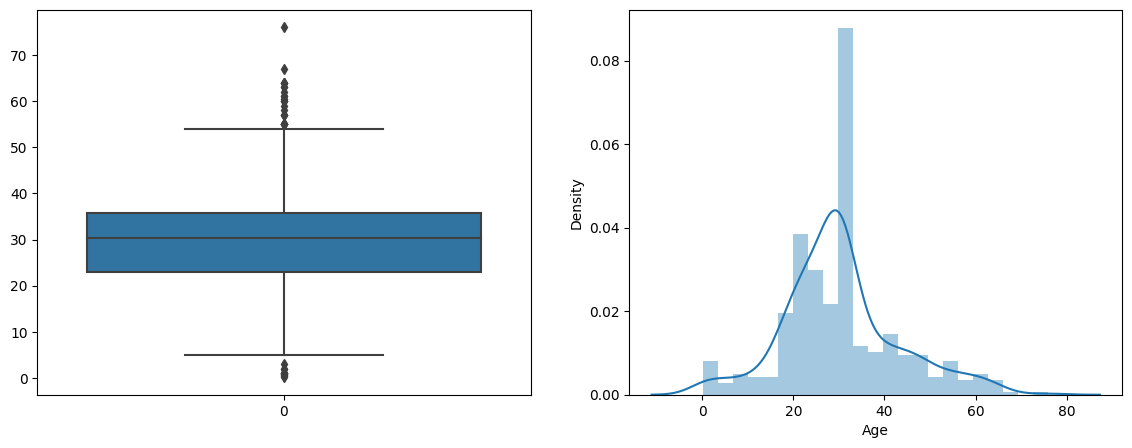

<ipython-input-28-5c5560f47458>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[column])


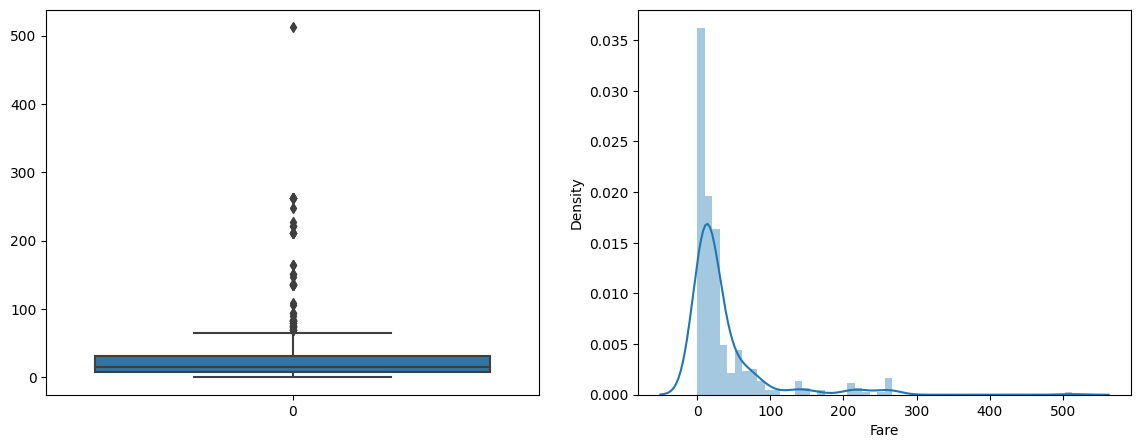

In [28]:
for column in ['Age', 'Fare']:
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ax = sns.boxplot(df[column])

    plt.subplot(1,2,2)
    ax = sns.distplot(df[column])
    plt.show()

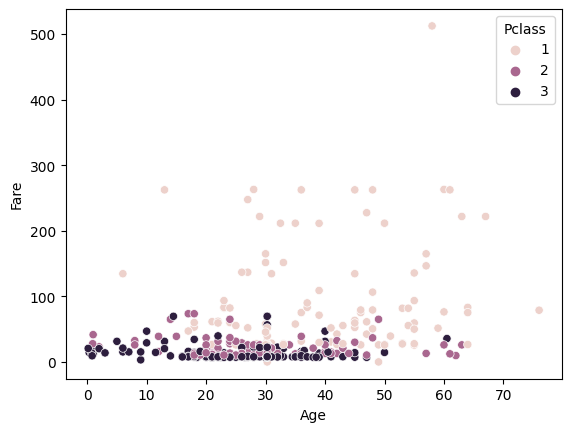

In [29]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass')
plt.show()

<ipython-input-30-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


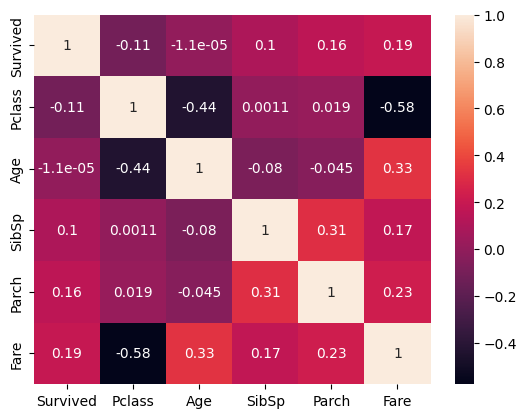

In [30]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### **Encoding categorical values to numerical**

In [31]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Sex"]=label.fit_transform(df["Sex"])
df['Embarked']=label.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


### **Spliting Independent and Dependent Features**

In [32]:
x=df.drop('Survived',axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [33]:
y=df['Survived']
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

### **MODEL SELECTION**

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [35]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
118,1,1,36.00000,0,0,75.2417,0
271,3,1,30.27259,0,0,7.7500,1
114,1,0,63.00000,1,0,221.7792,2
311,3,1,22.00000,0,0,7.2250,0
131,1,1,53.00000,0,0,28.5000,0
...,...,...,...,...,...,...,...
71,3,1,21.00000,0,0,7.8958,2
106,3,1,21.00000,0,0,7.8208,1
270,1,1,46.00000,0,0,75.2417,0
348,2,1,24.00000,0,0,13.5000,2


In [36]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
321,3,1,25.00000,0,0,7.2292,0
324,1,0,39.00000,0,0,211.3375,2
388,3,1,21.00000,0,0,7.7500,1
56,3,1,35.00000,0,0,7.8958,2
153,3,0,36.00000,0,2,12.1833,2
...,...,...,...,...,...,...,...
101,2,1,27.00000,1,0,26.0000,2
310,3,1,18.00000,0,0,8.6625,2
29,3,1,30.27259,2,0,21.6792,0
195,3,1,33.00000,0,0,7.8542,2


In [37]:
y_train

118    0
271    0
114    1
311    0
131    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Survived, Length: 292, dtype: int64

In [38]:
y_test

321    0
324    1
388    0
56     0
153    1
      ..
101    0
310    0
29     0
195    0
390    0
Name: Survived, Length: 126, dtype: int64

### **SCALING/ NORMALIZATION**

In [39]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [40]:
x_train

array([[-1.47596812,  0.78310898,  0.38989079, ..., -0.43509701,
         0.60029624, -1.59128384],
       [ 0.8727114 ,  0.78310898, -0.04584013, ..., -0.43509701,
        -0.51006323, -0.43542593],
       [-1.47596812, -1.27696148,  2.44400174, ..., -0.43509701,
         3.01110083,  0.72043199],
       ...,
       [-1.47596812,  0.78310898,  1.15067262, ..., -0.43509701,
         0.60029624, -1.59128384],
       [-0.30162836,  0.78310898, -0.52304742, ..., -0.43509701,
        -0.41546542,  0.72043199],
       [ 0.8727114 ,  0.78310898, -0.04584013, ..., -0.43509701,
        -0.51006323, -0.43542593]])

In [41]:
x_test

array([[ 0.87630936,  0.69451634, -0.34654133, -0.49467957, -0.32809136,
        -0.51572775, -1.77481869],
       [-1.57735684, -1.43985094,  0.90508223, -0.49467957, -0.32809136,
         4.46063183,  0.65591126],
       [ 0.87630936,  0.69451634, -0.70414806, -0.49467957, -0.32809136,
        -0.50303014, -0.55945372],
       [ 0.87630936,  0.69451634,  0.5474755 , -0.49467957, -0.32809136,
        -0.49947539,  0.65591126],
       [ 0.87630936, -1.43985094,  0.63687718, -0.49467957,  1.59467662,
        -0.39494196,  0.65591126],
       [-0.35052374,  0.69451634,  1.88850074,  0.72746995, -0.32809136,
        -0.05807732,  0.65591126],
       [ 0.87630936, -1.43985094,  0.0110654 , -0.49467957, -0.32809136,
        -0.49876347,  0.65591126],
       [-1.57735684,  0.69451634,  1.79909906, -0.49467957, -0.32809136,
        -0.05807732,  0.65591126],
       [-0.35052374, -1.43985094, -0.88295142, -0.49467957, -0.32809136,
        -0.37503001,  0.65591126],
       [ 0.87630936,  0.6945

### **MODEL CREATION**

### **1 Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [43]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,lr_pred)
print(result)
labels=['0','1']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[85  0]
 [ 0 41]]


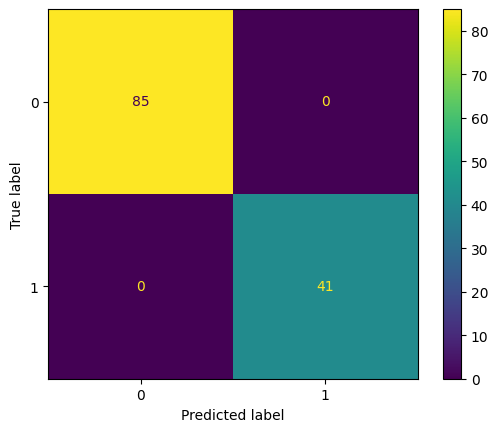

In [44]:
cmd.plot()

In [45]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
lr_report = classification_report(y_test, lr_pred)
lr_scores = cross_val_score(lr, x_train, y_train, cv=5, scoring='accuracy')
print('The classification report of Logistic Regression is below : ', '\n\n\n', lr_report)
print(f"Logistic Regression Mean Cross-Validation Score: {lr_scores}")

The classification report of Logistic Regression is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Logistic Regression Mean Cross-Validation Score: [1. 1. 1. 1. 1.]


### **2 Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [47]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result1=confusion_matrix(y_test,rf_pred)
print(result1)
labels=['0','1']
cmd=ConfusionMatrixDisplay(result1,display_labels=labels)

[[85  0]
 [ 0 41]]


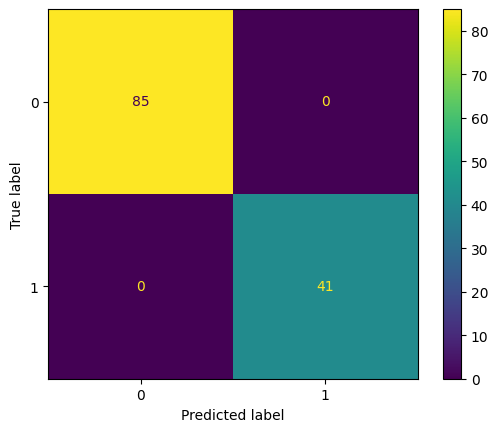

In [48]:
cmd.plot()

In [49]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
rf_report = classification_report(y_test, rf_pred)
rf_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
print('The classification report of Random forest is below : ', '\n\n\n', rf_report)
print(f"Random Forest Mean Cross-Validation Score: {rf_scores}")

The classification report of Random forest is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Random Forest Mean Cross-Validation Score: [1. 1. 1. 1. 1.]


### **3 Decision Tree**

In [50]:
from sklearn.tree import DecisionTreeClassifier
df_tree = DecisionTreeClassifier()
df_tree.fit(x_train,y_train)
y_pred_tree = df_tree.predict(x_test)
y_pred_tree

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [51]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result2=confusion_matrix(y_test,y_pred_tree)
print(result2)
labels=['0','1']
cmd=ConfusionMatrixDisplay(result2,display_labels=labels)

[[85  0]
 [ 0 41]]


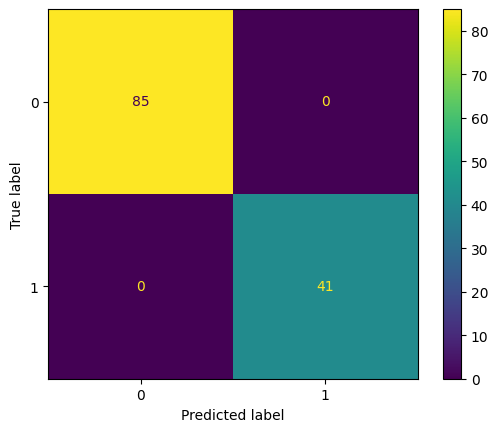

In [52]:
cmd.plot()

In [53]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
df_report = classification_report(y_test, y_pred_tree)
df_scores = cross_val_score(df_tree, x_train, y_train, cv=5, scoring='accuracy')
print('The classification report of Decision Tree is below : ', '\n\n\n', df_report)
print(f"Decision Tree Mean Cross-Validation Score: {df_scores}")

The classification report of Decision Tree is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Decision Tree Mean Cross-Validation Score: [1. 1. 1. 1. 1.]


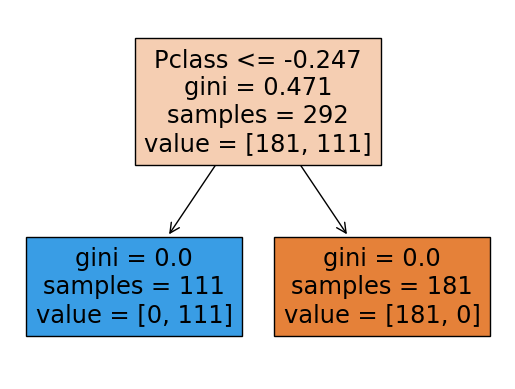

In [54]:
from sklearn.tree import plot_tree
plot_tree(df_tree, filled=True, feature_names=list(df.columns))
plt.show()



### **4 Gradien Boosting**

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)
gbc_pred


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [56]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result3=confusion_matrix(y_test,gbc_pred)
print(result3)
labels=['0','1']
cmd=ConfusionMatrixDisplay(result3,display_labels=labels)

[[85  0]
 [ 0 41]]


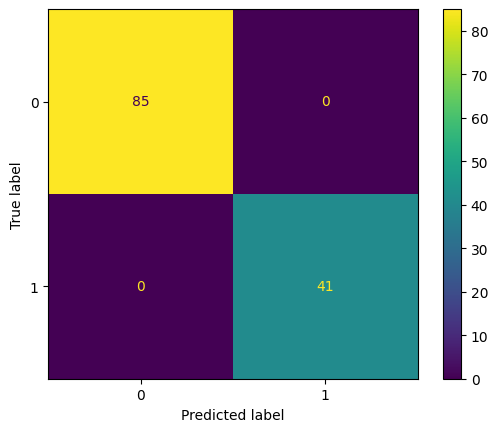

In [57]:
cmd.plot()

In [58]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
gbc_report = classification_report(y_test, gbc_pred)
gbc_scores = cross_val_score(gbc, x_train, y_train, cv=5, scoring='accuracy')
print('The classification report of Gradient boosting Classifier is below : ', '\n\n\n', gbc_report)
print(f"Gradient Boosting Classifier Mean Cross-Validation Score: {gbc_scores}")

The classification report of Gradient boosting Classifier is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Gradient Boosting Classifier Mean Cross-Validation Score: [1. 1. 1. 1. 1.]
